In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(0)

# Model definition

Let *k-nearest neighbors* of a new example $x$ be the $k$ examples out of the training set $X$ that minimize the distance function $d$ between $x$ and themselves.


For *classification* we can take the k-nearest neighbors of $x$ and assign the most popular class between them to $x$.   
For *regression* we can take the k-nearest neighbors of $x$ and assign the average of these data points' targets to $x$. We could also use an inverse distance weighted average.

In [2]:
def get_k_nearest_neighbors(x, X, y, dist, k):
    sorted_X = sorted(zip(X, y), key=dist(x))
    return list(zip(*sorted_X[:k])) # [(training examples), (corresponding targets)]

Let A and B be two $n$-row column vectors.  
Let's define a few distance functions:

1. Euclidean distance: $d(A, B) = \Vert {A - B}\Vert_2 = \sqrt{\displaystyle \sum_{i=1}^{n}(A_i - B_i)^2}$
2. Manhattan distance: $d(A, B) = \Vert {A - B}\Vert_1 = \displaystyle \sum_{i=1}^{n} \vert A_i - B_i \vert$
3. Chebyshev distance: $d(A, B) = \displaystyle \max_{i} \vert A_i - B_i \vert$

In [3]:
def d_euclidean(x):
    def d(Xi):
        return np.sqrt(np.sum((x - Xi[0]) ** 2))

    return d

def d_manhattan(x):
    def d(Xi):
        return np.sum(np.abs(x - Xi[0]))
    
    return d

def d_chebyshev(x):
    def d(Xi):
        return np.max(np.abs(x - Xi[0]))
    
    return d

Let's define the classification and regression functions now.

Let $X_{train}$ be the training set ($X$ in previous cells), $X_{test}$ be the test set (each row contains an example to classify), $y_{train}$ be the targets for the training set.

In [4]:
from scipy.stats import mode

def knn_classification(X_train, y_train, X_test, dist=d_euclidean, k=3):
    classes = []
    for x in X_test:
        k_nearest_neighbors, targets = get_k_nearest_neighbors(x, X_train, y_train, dist, k)
        classes.append(mode(targets)[0][0])
    
    return np.array(classes).reshape(-1, 1)

def knn_regression(X_train, y_train, X_test, dist=d_euclidean, k=3):
    avg_targets = []
    for x in X_test:
        k_nearest_neighbors, targets = get_k_nearest_neighbors(x, X_train, y_train, dist, k)
        avg_targets.append(np.mean(targets))
    
    return np.array(avg_targets).reshape(-1, 1)

# K-Nearest Neigbors in practice

## Classification

### 1. Generating data

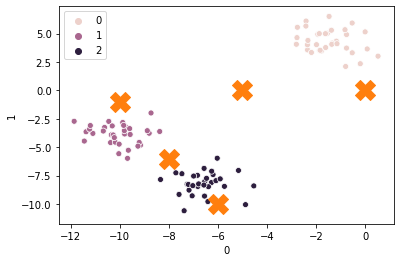

In [5]:
from sklearn.datasets import make_blobs

X_train, y_train = make_blobs(n_samples=100, centers=3, n_features=2, random_state=1)
sns.scatterplot(x=0, y=1, hue=y_train, data=pd.DataFrame(X_train))

X_test = np.array([[-10, -1], [0, 0], [-6, -10], [-8, -6], [-5, 0]]) # some random points on the scatterplot
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], marker='X', s=20 ** 2)

plt.show()

### 2. Training the model

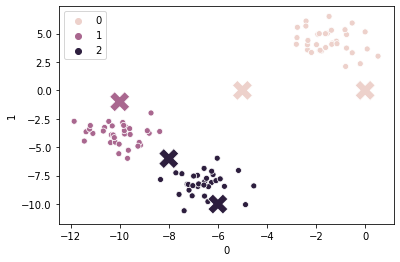

In [6]:
sns.scatterplot(x=0, y=1, hue=y_train, data=pd.DataFrame(X_train))

y_test = knn_classification(X_train, y_train, X_test)
sns.scatterplot(x=0, y=1, hue=y_test.reshape(-1), data=pd.DataFrame(X_test), legend=False, marker='X', s=20 ** 2)

plt.show()

## Regression

### 1. Generating data

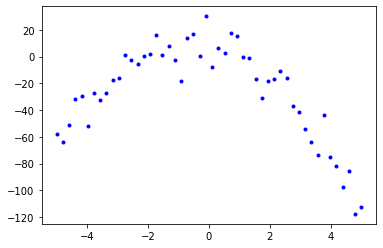

In [7]:
m = 50

X_train = np.linspace(-5, 5, m).reshape(-1, 1)
y_train = -4 * X_train ** 2 - 3.5 * X_train + 7.2

noise = np.random.normal(0, 10, m).reshape(-1, 1)
y_train += noise

plt.plot(X_train, y_train, 'b.')
plt.show()

### 2. Training the model

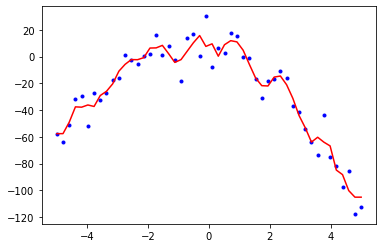

In [8]:
plt.plot(X_train, y_train, 'b.')

y_test = knn_regression(X_train, y_train, X_train)
plt.plot(X_train, y_test, 'r')

plt.show()